In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)


In [2]:
print(df.head())
print(df.describe())
print(df.info())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

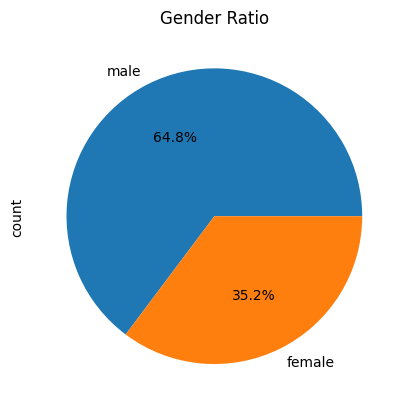

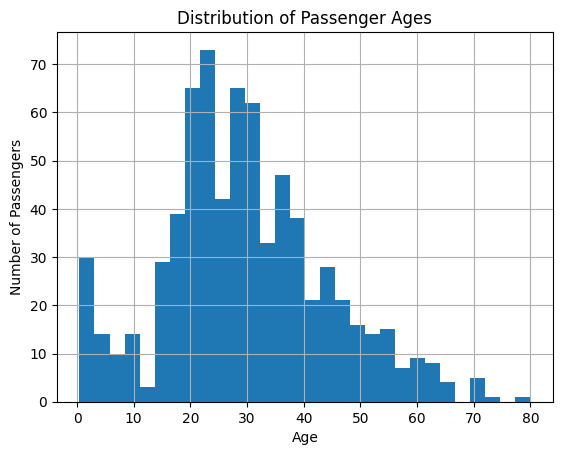

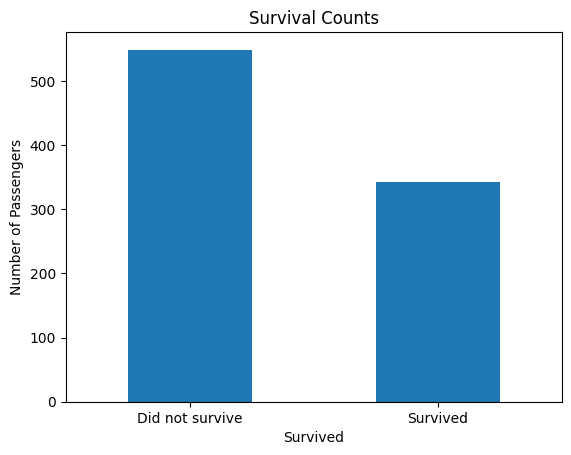

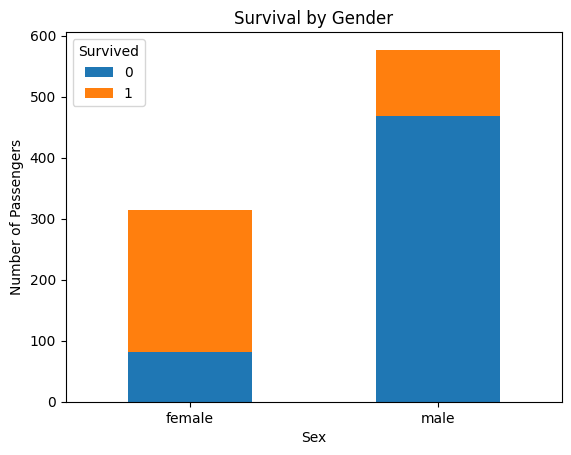

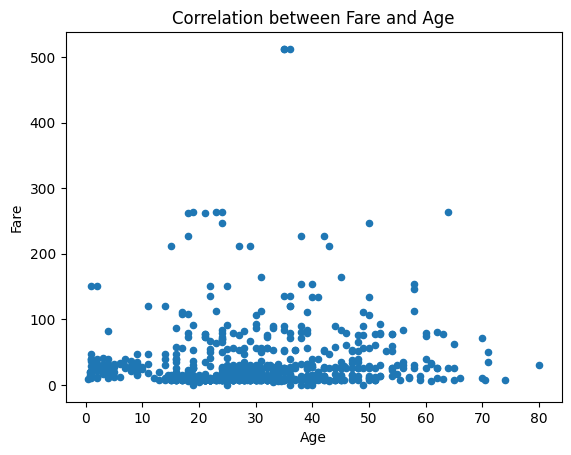

In [3]:
import matplotlib.pyplot as plt

# Pie chart for gender ratio
gender_counts = df['Sex'].value_counts()
gender_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Gender Ratio')
plt.show()

# Histogram for age distribution
df['Age'].hist(bins=30)
plt.title('Distribution of Passenger Ages')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.show()

# Bar plot for survival
survival_counts = df['Survived'].value_counts()
survival_counts.plot(kind='bar')
plt.title('Survival Counts')
plt.xticks(ticks=[0,1], labels=['Did not survive', 'Survived'], rotation=0)
plt.ylabel('Number of Passengers')
plt.show()

# Stacked bar plot for survival by gender
gender_survival_counts = df.groupby(['Sex', 'Survived']).size().unstack()
gender_survival_counts.plot(kind='bar', stacked=True)
plt.title('Survival by Gender')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=0)
plt.show()

# Scatter plot for fare vs age
df.plot.scatter(x='Age', y='Fare')
plt.title('Correlation between Fare and Age')
plt.show()


In [9]:
# Handle missing values in Age
df['Age'].fillna(df['Age'].median(), inplace=True)

# Normalize the Fare column
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['Fare'] = scaler.fit_transform(df[['Fare']])

# One-hot encoding for Sex column
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)


KeyError: "None of [Index(['Sex'], dtype='object')] are in the [columns]"

In [6]:
# Survival rate for different genders
gender_survival_rate = df.groupby('Sex_male')['Survived'].mean()
print(gender_survival_rate)

# Survival rate for different passenger classes
class_survival_rate = df.groupby('Pclass')['Survived'].mean()
print(class_survival_rate)

# Passenger with the highest fare
highest_fare_passenger = df[df['Fare'] == df['Fare'].max()]
print(highest_fare_passenger)


Sex_male
False    0.742038
True     0.188908
Name: Survived, dtype: float64
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64
     PassengerId  Survived  Pclass                                Name   Age  \
258          259         1       1                    Ward, Miss. Anna  35.0   
679          680         1       1  Cardeza, Mr. Thomas Drake Martinez  36.0   
737          738         1       1              Lesurer, Mr. Gustave J  35.0   

     SibSp  Parch    Ticket  Fare        Cabin Embarked  Sex_male  
258      0      0  PC 17755   1.0          NaN        C     False  
679      0      1  PC 17755   1.0  B51 B53 B55        C      True  
737      0      0  PC 17755   1.0         B101        C      True  
